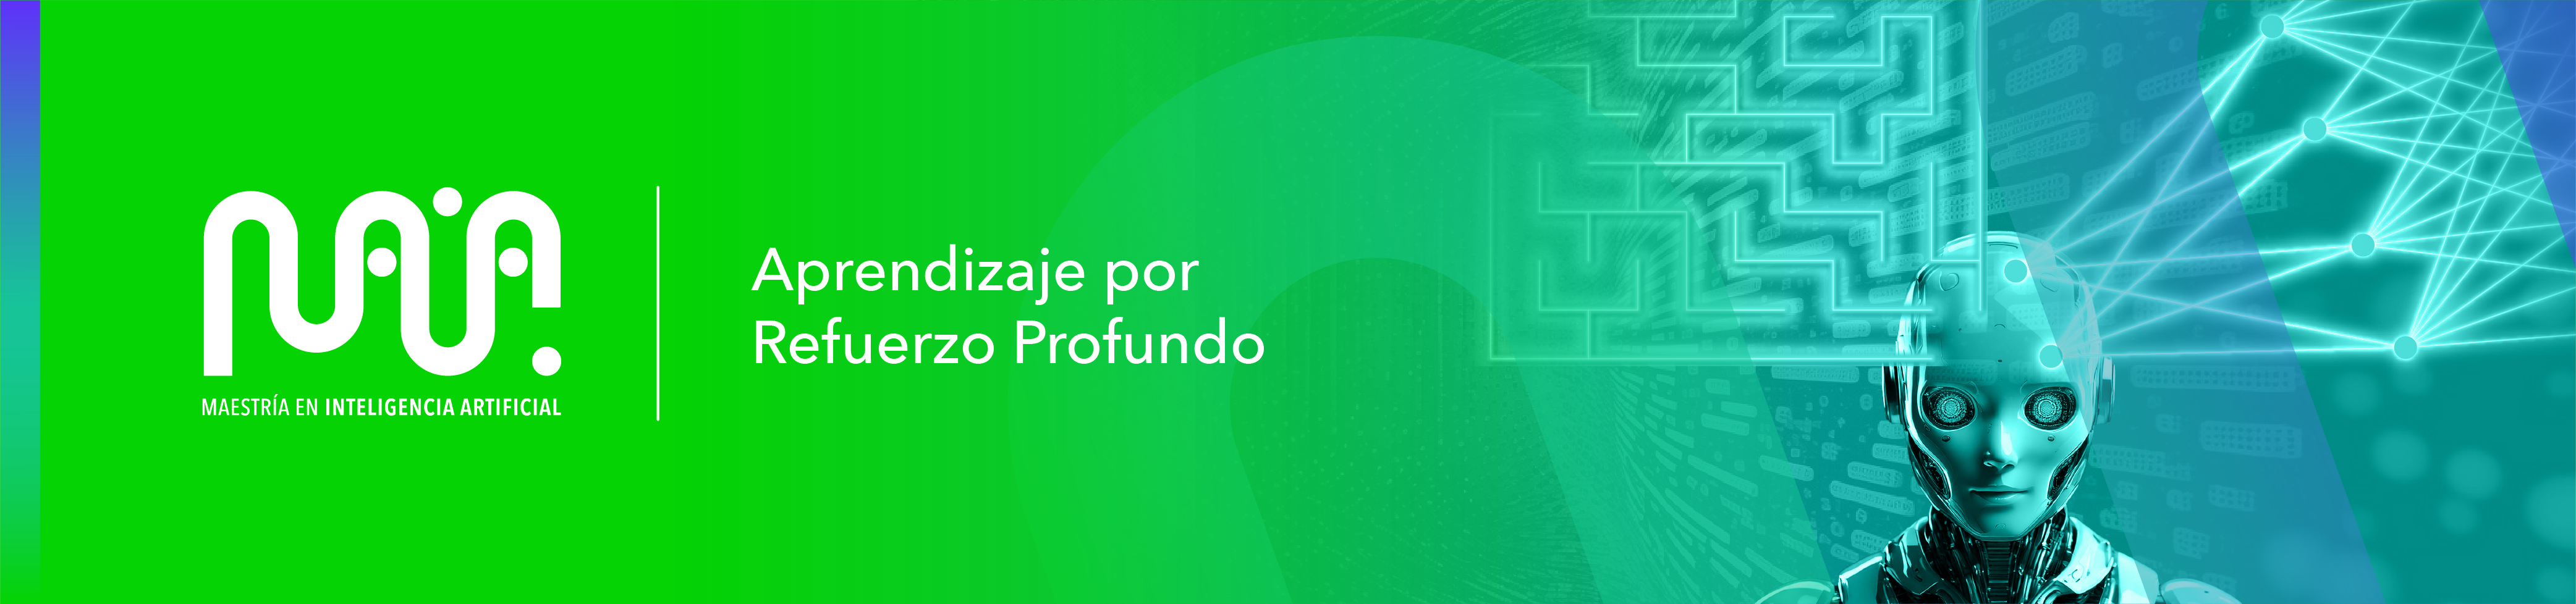

# <h1><center>Gymnasium-Robotics</h1>

En este notebook se demostrará cómo ejecutar una política aleatoria en dos entornos del paquete Gymnasium Robotics. Específicamente, trabajaremos con los entornos **AdroitHandDoor-v1**, **FetchReachDense-v4** y **HandReachDense-v3**, los cuales representan tareas de manipulación robótica con diferentes niveles de complejidad. El objetivo es observar el comportamiento básico de estos entornos al aplicar acciones aleatorias durante un episodio, lo cual resulta útil para familiarizarse con su dinámica, espacio de observación y espacio de acción antes de entrenar agentes con algoritmos de aprendizaje por refuerzo.


# Intalación de librerías

In [10]:
!pip install git+https://github.com/Farama-Foundation/Gymnasium-Robotics.git

  Cloning https://github.com/Farama-Foundation/Gymnasium-Robotics.git to /tmp/pip-req-build-uopw15ho
  Running command git clone --filter=blob:none --quiet https://github.com/Farama-Foundation/Gymnasium-Robotics.git /tmp/pip-req-build-uopw15ho
  Resolved https://github.com/Farama-Foundation/Gymnasium-Robotics.git to commit 003dc3afd56a0d5a350858e3e9ce42512f8d77df
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [11]:
# Actualización de paquetes del sistema
!apt update -y

# Instalación de herramientas del sistema necesarias
!apt install -y xvfb
!apt install -y ffmpeg

# Instalación de paquetes de Python (con extras)
!pip install gymnasium[other]
!pip install pyvirtualdisplay
!pip install imageio[ffmpeg]

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 1s (2,724 B/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
35 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of

In [12]:
from pyvirtualdisplay import Display
# Para mostrar video
from IPython.display import HTML, clear_output
from base64 import b64encode

# Librerías básicas
import gymnasium as gym
import imageio
import os
import time
import gymnasium_robotics

#Limpia los registros generados
from IPython.display import clear_output
clear_output()
print("Todas las librerías y dependencias han sido instaladas correctamente.")

Todas las librerías y dependencias han sido instaladas correctamente.


# AdroitHandDoor-v1

In [13]:
# Start a virtual display (needed in Colab or headless environments)
display = Display(visible=0, size=(1400, 900))
display.start()

# Create Adroit Door environment with RGB rendering
env = gym.make("AdroitHandDoor-v1", render_mode="rgb_array")
obs, info = env.reset(seed=42)

frames = []
terminated = truncated = False
total_reward = 0

def policy(observation):
    # Dummy policy: random actions (replace with trained model or custom logic)
    return env.action_space.sample()

while not (terminated or truncated):
    action = policy(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    total_reward += reward

env.close()

# Save video
video_filename = "adroit_door_random_policy.mp4"
imageio.mimsave(video_filename, frames, fps=30)

print("Video saved to:", video_filename)
print("Total reward:", total_reward)

Video saved to: adroit_door_random_policy.mp4
Total reward: -45.7654440656749


In [14]:
mp4 = open("/content/adroit_door_random_policy.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=600 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

# FetchReachDense-v4







In [15]:
# Start a virtual display (needed in Colab or headless)
display = Display(visible=0, size=(1400, 900))
display.start()

# Create FetchPickAndPlace environment with RGB rendering
env = gym.make("FetchReachDense-v4", render_mode="rgb_array")
obs, info = env.reset(seed=42)

frames = []
terminated = truncated = False
total_reward = 0

def policy(observation):
    # Dummy policy: zeros for all action dimensions (4D for Fetch)
    return env.action_space.sample()  # Replace with custom logic if needed

while not (terminated or truncated):
    action = policy(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    total_reward += reward

env.close()

# Save video
video_filename = "fetch_reach.mp4"
imageio.mimsave(video_filename, frames, fps=30)

print("Video saved to:", video_filename)
print("Total reward:", total_reward)

Video saved to: fetch_reach.mp4
Total reward: -10.494702962496607


In [16]:
mp4 = open("/content/fetch_reach.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=600 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

# HandReachDense-v3

In [17]:
# Start a virtual display (needed in Colab or headless)
display = Display(visible=0, size=(1400, 900))
display.start()

# Create FetchPickAndPlace environment with RGB rendering
env = gym.make("HandReachDense-v3", render_mode="rgb_array")
obs, info = env.reset(seed=42)

frames = []
terminated = truncated = False
total_reward = 0

def policy(observation):
    # Dummy policy: zeros for all action dimensions (4D for Fetch)
    return env.action_space.sample()  # Replace with custom logic if needed

while not (terminated or truncated):
    action = policy(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    total_reward += reward

env.close()

# Save video
video_filename = "hand_reach.mp4"
imageio.mimsave(video_filename, frames, fps=30)

print("Video saved to:", video_filename)
print("Total reward:", total_reward)

Video saved to: hand_reach.mp4
Total reward: -6.219329925732633


In [18]:
mp4 = open("/content/hand_reach.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=600 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")